In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import tree_constructor

In [2]:
# Mock up dataframe used to visualize trees and then create a function to visualize those trees 
df = pd.DataFrame({
    'Clade 4':['Asterids','Rosids','Rosids','Rosids','Asterids','Rosids'],
    'Order':['Lamiales','Rosales','Malpighiales','Rosales','Solanales','Cucurbitales'],
    'Family':['Lamiaceae','Cannabaceae','Euphorbiaceae','Moraceae','Solanaceae','Begoniaceae'],
    'Subfamily':[None,None,'Crotonoideae',None,None,None],
    'Genus':['Ocimum','Cannabis','Croton','Ficus','Solanum','Begonia'],
    'Species':[None,None,None,'F. elastica','S. tuberosum',None],
    'Common Name':['Basil','Cannabis','Croton','Rubber Plant','Potatoes','Begonia']
})
df['Kingdom'] = 'Plantae'
df['Clade 1'] = 'Tracheophytes'
df['Clade 2'] = 'Angiosperms'
df['Clade 3'] = 'Eudicots'

ordering_list = ['Kingdom','Clade 1','Clade 2','Clade 3','Clade 4','Order','Family','Subfamily','Genus','Species','Common Name']

In [3]:
df

,Clade 4,Order,Family,Subfamily,Genus,Species,Common Name,Kingdom,Clade 1,Clade 2,Clade 3
0,Asterids,Lamiales,Lamiaceae,None,Ocimum,None,Basil,Plantae,Tracheophytes,Angiosperms,Eudicots
1,Rosids,Rosales,Cannabaceae,None,Cannabis,None,Cannabis,Plantae,Tracheophytes,Angiosperms,Eudicots
2,Rosids,Malpighiales,Euphorbiaceae,Crotonoideae,Croton,None,Croton,Plantae,Tracheophytes,Angiosperms,Eudicots
3,Rosids,Rosales,Moraceae,None,Ficus,F. elastica,Rubber Plant,Plantae,Tracheophytes,Angiosperms,Eudicots
4,Asterids,Solanales,Solanaceae,None,Solanum,S. tuberosum,Potatoes,Plantae,Tracheophytes,Angiosperms,Eudicots
5,Rosids,Cucurbitales,Begoniaceae,None,Begonia,None,Begonia,Plantae,Tracheophytes,Angiosperms,Eudicots


In [4]:
common_level, common_ancestor, descendants, descendant_level = tree_constructor.find_common_ancestor(df, ordering_list)
print(common_level)
print(common_ancestor)
print(descendants)
print(descendant_level)

Clade 3
Eudicots
['Asterids' 'Rosids']
Clade 4


In [5]:
high_common_level, high_common_ancestor, high_descendants, high_descendant_level = tree_constructor.find_common_ancestor(df, ordering_list)
if common_level is not None:
    for descendant in high_descendants: 
        descendant_df = df[df[high_descendant_level] == descendant]
        print(descendant_df)
        low_common_level, low_common_ancestor, low_descendants, low_descendant_level = tree_constructor.find_common_ancestor(descendant_df, ordering_list)
        print(low_common_level)
        print(low_common_ancestor)
        print(low_descendants)
        print(low_descendant_level)

    Clade 4      Order      Family Subfamily    Genus       Species  \
0  Asterids   Lamiales   Lamiaceae      None   Ocimum          None   
4  Asterids  Solanales  Solanaceae      None  Solanum  S. tuberosum   

  Common Name  Kingdom        Clade 1      Clade 2   Clade 3  
0       Basil  Plantae  Tracheophytes  Angiosperms  Eudicots  
4    Potatoes  Plantae  Tracheophytes  Angiosperms  Eudicots  
Clade 4
Asterids
['Lamiales' 'Solanales']
Order
  Clade 4         Order         Family     Subfamily     Genus      Species  \
1  Rosids       Rosales    Cannabaceae          None  Cannabis         None   
2  Rosids  Malpighiales  Euphorbiaceae  Crotonoideae    Croton         None   
3  Rosids       Rosales       Moraceae          None     Ficus  F. elastica   
5  Rosids  Cucurbitales    Begoniaceae          None   Begonia         None   

    Common Name  Kingdom        Clade 1      Clade 2   Clade 3  
1      Cannabis  Plantae  Tracheophytes  Angiosperms  Eudicots  
2        Croton  Planta

In [6]:
def add_descendant_edge_recursion(graph, data_frame, ordering):
    common_level, common_ancestor, descendants, descendant_level = tree_constructor.find_common_ancestor(data_frame, ordering)
    if common_level is not None:
        for descendant in descendants: 
            graph.add_edge(common_ancestor, descendant)
            descendant_df = data_frame[data_frame[descendant_level] == descendant]
            add_descendant_edge_recursion(graph, descendant_df, ordering)
    return(graph)

In [7]:
def visualize_genetic_relationships(data_frame, ordering):
    """
    Visualizes genetic relationships between species as clades using Divisive Hierarchical Clustering.

    Parameters:
    - data_frame: pandas DataFrame with hierarchical levels of different species.

    Returns:
    - None (displays the dendrogram plot).
    """
    
    G = nx.DiGraph() 

    G = add_descendant_edge_recursion(G, data_frame, ordering)
    # Plot the dendrogram
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

    # Display the plot
    plt.show()

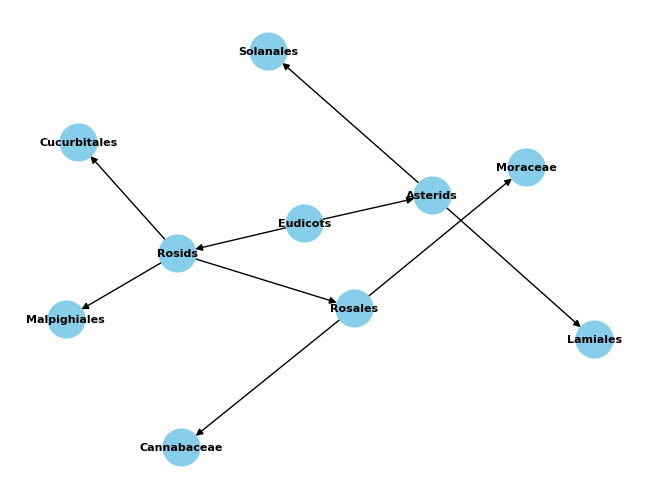

In [8]:
visualize_genetic_relationships(df, ordering_list)